In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import time

random.seed(100)

In [48]:
dataset = pd.read_csv('financial_data.csv')

In [49]:
dataset.shape

(17908, 21)

In [50]:
dataset.head()

,entry_id,age,pay_schedule,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,...,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
0,7629673,40,bi-weekly,1,3135,0,3,3,6,2,...,550,36200,0.737398,0.903517,0.487712,0.515977,0.580918,0.380918,10,1
1,3560428,61,weekly,0,3180,0,6,3,2,7,...,600,30150,0.738510,0.881027,0.713423,0.826402,0.730720,0.630720,9,0
2,6934997,23,weekly,0,1540,6,0,0,7,1,...,450,34550,0.642993,0.766554,0.595018,0.762284,0.531712,0.531712,7,0
3,5682812,40,bi-weekly,0,5230,0,6,1,2,7,...,700,42150,0.665224,0.960832,0.767828,0.778831,0.792552,0.592552,8,1
4,5335819,33,semi-monthly,0,3590,0,5,2,2,8,...,1100,53850,0.617361,0.857560,0.613487,0.665523,0.744634,0.744634,12,0


In [51]:
dataset

,entry_id,age,pay_schedule,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,...,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
0,7629673,40,bi-weekly,1,3135,0,3,3,6,2,...,550,36200,0.737398,0.903517,0.487712,0.515977,0.580918,0.380918,10,1
1,3560428,61,weekly,0,3180,0,6,3,2,7,...,600,30150,0.738510,0.881027,0.713423,0.826402,0.730720,0.630720,9,0
2,6934997,23,weekly,0,1540,6,0,0,7,1,...,450,34550,0.642993,0.766554,0.595018,0.762284,0.531712,0.531712,7,0
3,5682812,40,bi-weekly,0,5230,0,6,1,2,7,...,700,42150,0.665224,0.960832,0.767828,0.778831,0.792552,0.592552,8,1
4,5335819,33,semi-monthly,0,3590,0,5,2,2,8,...,1100,53850,0.617361,0.857560,0.613487,0.665523,0.744634,0.744634,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17903,9949728,31,monthly,0,3245,0,5,3,2,6,...,700,71700,0.691126,0.928196,0.664112,0.838012,0.727705,0.627705,2,0
17904,9442442,46,bi-weekly,0,6525,0,2,1,3,3,...,800,51800,0.648525,0.970832,0.699241,0.844724,0.774918,0.474918,3,0
17905,9857590,46,weekly,0,2685,0,5,1,1,8,...,1200,59650,0.677975,0.918141,0.687981,0.939101,0.472045,0.672045,9,0
17906,8708471,42,bi-weekly,0,2515,0,3,5,6,1,...,400,80200,0.642741,0.885684,0.456448,0.686823,0.406568,0.406568,3,1


In [52]:
dataset.describe()

,entry_id,age,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
count,1.790800e+04,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000
mean,5.596978e+06,43.015412,0.425173,3657.214653,1.186006,3.526860,3.584711,3.427183,3.503350,0.795399,950.446449,61086.302211,0.690878,0.878276,0.583155,0.718252,0.623112,0.622068,6.457226,0.538251
std,2.562473e+06,11.873107,0.494383,1504.890063,2.400897,2.259732,2.751937,2.216440,1.955568,0.403421,698.543683,15394.255020,0.090470,0.054563,0.125061,0.120697,0.139729,0.139898,3.673093,0.498549
min,1.111398e+06,18.000000,0.000000,905.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,350.000000,2100.000000,0.023258,0.451371,0.016724,0.153367,0.010184,0.006622,1.000000,0.000000
25%,3.378999e+06,34.000000,0.000000,2580.000000,0.000000,2.000000,2.000000,2.000000,2.000000,1.000000,600.000000,49350.000000,0.640993,0.850882,0.500208,0.633708,0.521735,0.519677,4.000000,0.000000
50%,5.608376e+06,42.000000,0.000000,3260.000000,0.000000,3.000000,3.000000,2.000000,3.000000,1.000000,700.000000,61200.000000,0.699561,0.881004,0.588208,0.725113,0.625944,0.622974,6.000000,1.000000
75%,7.805624e+06,51.000000,1.000000,4670.000000,1.000000,5.000000,5.000000,5.000000,4.000000,1.000000,1100.000000,72750.000000,0.752887,0.912608,0.672395,0.806681,0.729841,0.728940,8.000000,1.000000
max,9.999874e+06,96.000000,1.000000,9985.000000,11.000000,16.000000,12.000000,11.000000,15.000000,1.000000,10200.000000,99750.000000,0.999997,0.999024,0.978932,0.996260,0.970249,0.966953,30.000000,1.000000


## Cleaning the data

In [53]:
dataset.isna().any()
# remoce all columns with na field in them as they are not useful

entry_id                False
age                     False
pay_schedule            False
home_owner              False
income                  False
months_employed         False
years_employed          False
current_address_year    False
personal_account_m      False
personal_account_y      False
has_debt                False
amount_requested        False
risk_score              False
risk_score_2            False
risk_score_3            False
risk_score_4            False
risk_score_5            False
ext_quality_score       False
ext_quality_score_2     False
inquiries_last_month    False
e_signed                False
dtype: bool

## Histograms

In [54]:
dataset2 = dataset.drop(columns = ['entry_id','pay_schedule','e_signed'])

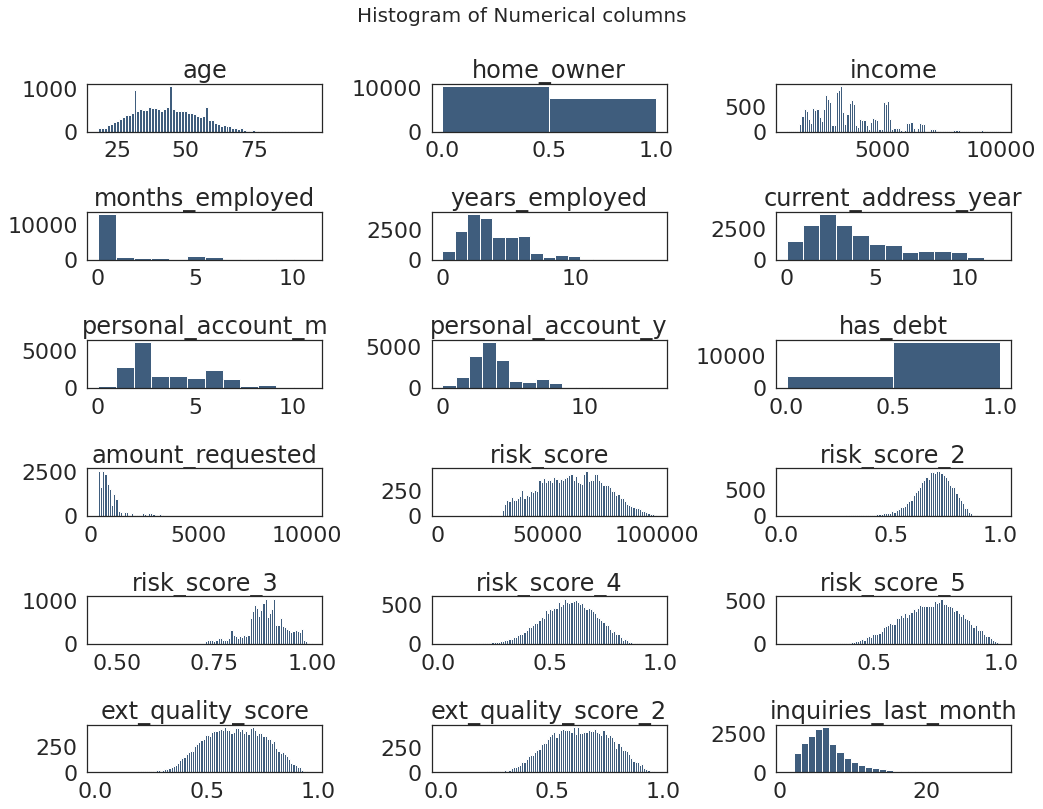

In [55]:
fig = plt.figure(figsize=(15,12))
plt.suptitle('Histogram of Numerical columns', fontsize=20)
for i in range(dataset2.shape[1]):
    plt.subplot(6,3,i+1)
    f = plt.gca()
    f.set_title(dataset2.columns.values[i])
    
    vals = np.size(dataset2.iloc[:,i].unique())
    if vals>= 100:
        vals=100
        
    plt.hist(dataset2.iloc[:,i], bins=vals, color='#3F5D7D')
plt.tight_layout(rect=[0,0.03,1,0.95])

## Correlation with Response variable(Note: Models like RF are not linear like these)

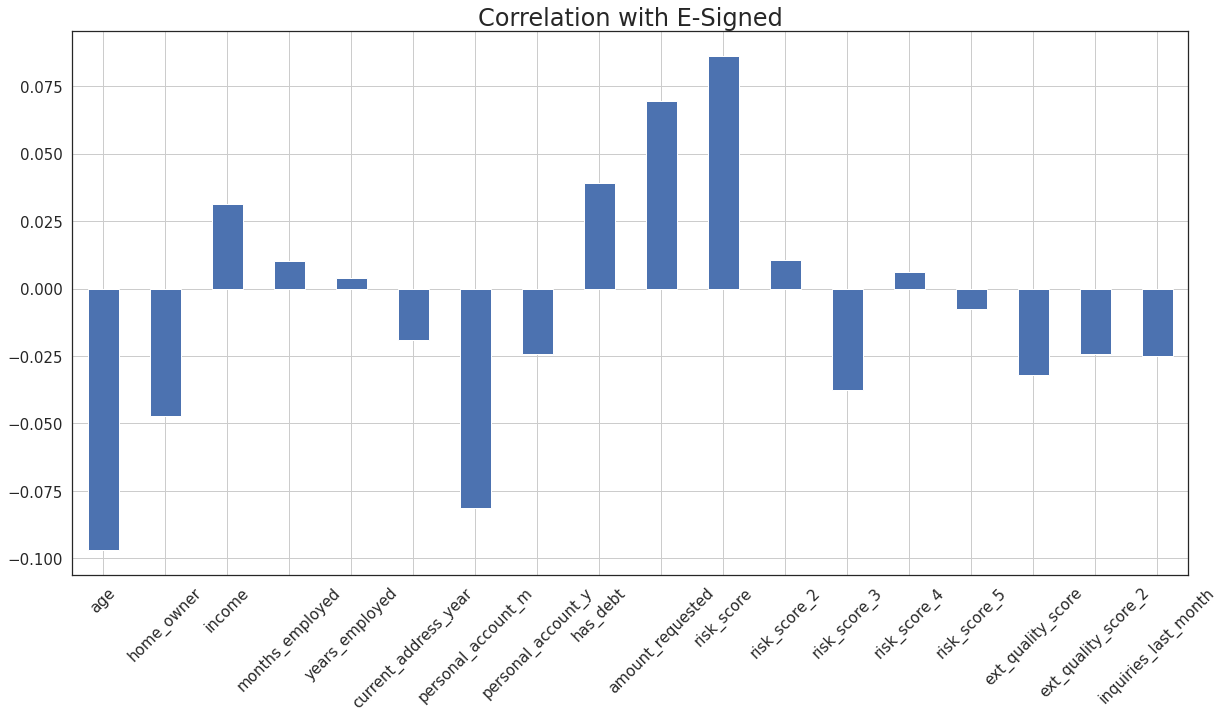

In [56]:
dataset2.corrwith(dataset.e_signed).plot.bar(
figsize = (20,10),
    title = 'Correlation with E-Signed',
    fontsize = 15,
    rot = 45,
    grid = True)

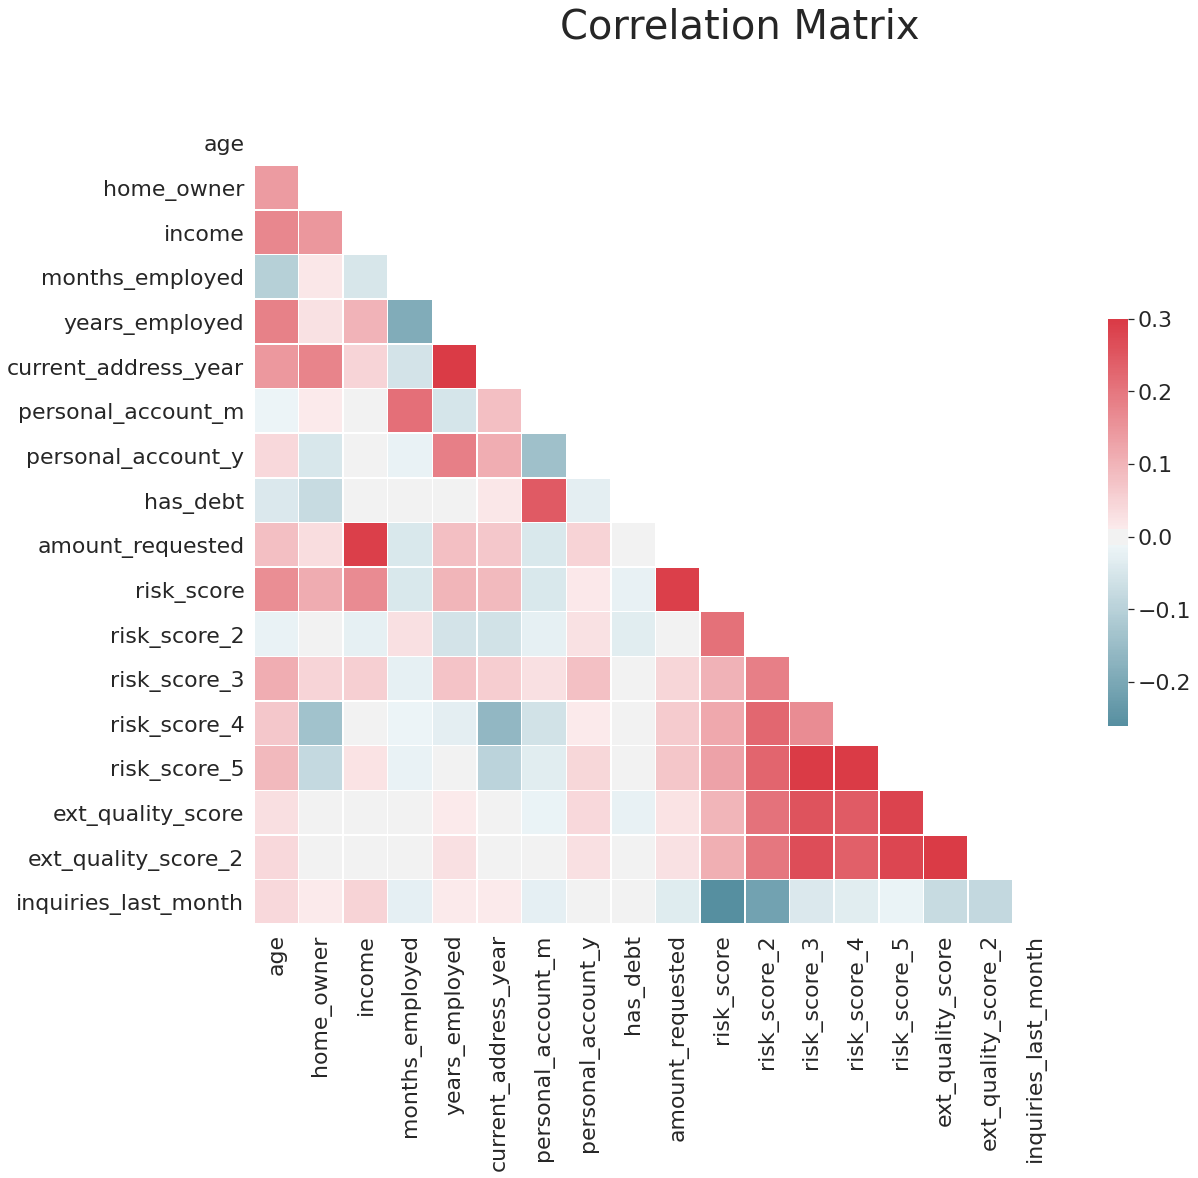

In [57]:
# correlation matrix 
sns.set(style = 'white', font_scale =2)

# Compute the correlation matrix
corr = dataset2.corr()

#Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype = np.bool)
mask[np.triu_indices_from(mask)]= True

# Set up the matplotlib figure
fig,axes = plt.subplots(figsize = (18,15))
fig.suptitle("Correlation Matrix", fontsize = 40)

# Generating a custom divergence colormap
cmap = sns.diverging_palette(220,10,as_cmap = True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr,mask = mask, cmap = cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink":.5})

## Feature Engineering

In [58]:
dataset = dataset.drop(columns='months_employed')

In [59]:
dataset['personal_account_months'] = (dataset.personal_account_m+(dataset.personal_account_y*12))

In [60]:
dataset[['personal_account_months','personal_account_y','personal_account_m']].head()

,personal_account_months,personal_account_y,personal_account_m
0,30,2,6
1,86,7,2
2,19,1,7
3,86,7,2
4,98,8,2


In [61]:
dataset = dataset.drop(columns = ['personal_account_y','personal_account_m'])

## One Hot Encoding

In [62]:
dataset = pd.get_dummies(dataset)

In [63]:
dataset.columns

Index(['entry_id', 'age', 'home_owner', 'income', 'years_employed',
       'current_address_year', 'has_debt', 'amount_requested', 'risk_score',
       'risk_score_2', 'risk_score_3', 'risk_score_4', 'risk_score_5',
       'ext_quality_score', 'ext_quality_score_2', 'inquiries_last_month',
       'e_signed', 'personal_account_months', 'pay_schedule_bi-weekly',
       'pay_schedule_monthly', 'pay_schedule_semi-monthly',
       'pay_schedule_weekly'],
      dtype='object')

In [64]:
dataset = dataset.drop(columns = 'pay_schedule_semi-monthly')

In [65]:
#get rid of other columns that are useful but not part of training set
response = dataset["e_signed"]
user = dataset["entry_id"]
dataset = dataset.drop(columns = ['e_signed','entry_id'])

# Splitting into train and test

In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset,response,
                                                    test_size=0.2,
                                                    random_state = 0)

# Feature Scaling

In [67]:
from sklearn.preprocessing import StandardScaler

In [70]:
sc_X = StandardScaler()

In [73]:
X_train_scaled = pd.DataFrame(sc_X.fit_transform(X_train))

In [74]:
X_test_scaled = pd.DataFrame(sc_X.fit_transform(X_test))

In [76]:
X_train_scaled.columns = X_train.columns.values
X_test_scaled.columns = X_test.columns.values

X_train_scaled.index = X_train.index.values
X_test_scaled.index = X_test.index.values

# Model Building

## comparing models

In [115]:
# Logistic regression
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0,penalty = 'l1',solver='saga')
classifier.fit(X_train_scaled,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=0, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [116]:
# predictions
y_pred= classifier.predict(X_test_scaled)

In [117]:
# Metrics
from sklearn.metrics import confusion_matrix,f1_score,accuracy_score,precision_score,recall_score

In [118]:
acc = accuracy_score(y_test,y_pred)
prec = precision_score(y_test,y_pred)
rec = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)

In [119]:
results = pd.DataFrame([['LogisticRegression (lasso)',acc,prec,rec,f1]],columns =['Model','Accuracy','Precission','Recall','F! Score'])

In [120]:
results

,Model,Accuracy,Precission,Recall,F! Score
0,LogisticRegression (lasso),0.563372,0.577778,0.701245,0.633552


## SVM(Linear) - support vector machine

In [121]:
from sklearn.svm import SVC
classifier1 = SVC(random_state=0,kernel = 'linear')
classifier1.fit(X_train_scaled,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [122]:
# predictions
y_pred= classifier1.predict(X_test_scaled)

# Metrics
from sklearn.metrics import confusion_matrix,f1_score,accuracy_score,precision_score,recall_score

acc = accuracy_score(y_test,y_pred)
prec = precision_score(y_test,y_pred)
rec = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)

In [123]:
model_results = pd.DataFrame([['SVM (linear)',acc,prec,rec,f1]],columns =['Model','Accuracy','Precission','Recall','F! Score'])

In [124]:
results = results.append(model_results,ignore_index = True)

In [125]:
results

,Model,Accuracy,Precission,Recall,F! Score
0,LogisticRegression (lasso),0.563372,0.577778,0.701245,0.633552
1,SVM (linear),0.568398,0.578536,0.729772,0.645413


In [126]:
#rbf

from sklearn.svm import SVC
classifier1 = SVC(random_state=0,kernel = 'rbf')
classifier1.fit(X_train_scaled,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [127]:
# predictions
y_pred= classifier1.predict(X_test_scaled)

# Metrics
from sklearn.metrics import confusion_matrix,f1_score,accuracy_score,precision_score,recall_score

acc = accuracy_score(y_test,y_pred)
prec = precision_score(y_test,y_pred)
rec = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)

In [128]:
model_results = pd.DataFrame([['SVM (rbf)',acc,prec,rec,f1]],columns =['Model','Accuracy','Precission','Recall','F! Score'])

In [129]:
results = results.append(model_results,ignore_index = True)

In [130]:
results

,Model,Accuracy,Precission,Recall,F! Score
0,LogisticRegression (lasso),0.563372,0.577778,0.701245,0.633552
1,SVM (linear),0.568398,0.578536,0.729772,0.645413
2,SVM (rbf),0.592686,0.607519,0.687241,0.644926


In [131]:
#random forrest

from sklearn.ensemble import RandomForestClassifier
classifier1 = RandomForestClassifier(random_state=0,n_estimators=100,
                                     criterion='entropy')
classifier1.fit(X_train_scaled,y_train)

# predictions
y_pred= classifier1.predict(X_test_scaled)

# Metrics
from sklearn.metrics import confusion_matrix,f1_score,accuracy_score,precision_score,recall_score

acc = accuracy_score(y_test,y_pred)
prec = precision_score(y_test,y_pred)
rec = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)

model_results = pd.DataFrame([['Random Forrest(n=100)',acc,prec,rec,f1]],columns =['Model','Accuracy','Precission','Recall','F! Score'])

results = results.append(model_results,ignore_index = True)

results

,Model,Accuracy,Precission,Recall,F! Score
0,LogisticRegression (lasso),0.563372,0.577778,0.701245,0.633552
1,SVM (linear),0.568398,0.578536,0.729772,0.645413
2,SVM (rbf),0.592686,0.607519,0.687241,0.644926
3,Random Forrest(n=100),0.623953,0.643741,0.674793,0.658901


# Kfold Cross Validation

In [132]:
from sklearn.model_selection import cross_val_score

In [135]:
accuracies = cross_val_score(estimator=classifier1,X=X_train_scaled,y=y_train,cv=10)

In [136]:
print('Random Forrest Classifier Accuracy: %0.2f(+/- %0.2f)'%(accuracies.mean(),accuracies.std()*2))

Random Forrest Classifier Accuracy: 0.63(+/- 0.03)


In [137]:
results

,Model,Accuracy,Precission,Recall,F! Score
0,LogisticRegression (lasso),0.563372,0.577778,0.701245,0.633552
1,SVM (linear),0.568398,0.578536,0.729772,0.645413
2,SVM (rbf),0.592686,0.607519,0.687241,0.644926
3,Random Forrest(n=100),0.623953,0.643741,0.674793,0.658901


### Parameter Tuning 

Grid Search

In [138]:
# round 1: Entropy
parameters={"max_depth":[3,None],
           "max_features":[1,5,10],
           "min_samples_split":[2,5,10],
           'min_samples_leaf':[1,5,10],
            "bootstrap":[True,False],
            "criterion":["entropy"]
           }

In [139]:
from sklearn.model_selection import GridSearchCV

In [141]:
grid_search = GridSearchCV(estimator = classifier1,
                          param_grid = parameters,
                          scoring = "accuracy",
                          cv = 10,
                          n_jobs = -1)

In [145]:
t0 = time.time()
grid_search = grid_search.fit(X_train_scaled,y_train)
t1=time.time()
print("Took %0.2f seconds"%(t1-t0))

Took 1332.07 seconds


In [146]:
rf_best_accuracy = grid_search.best_score_
rf_best_parameters = grid_search.best_params_

In [147]:
rf_best_accuracy,rf_best_parameters

(0.6345122647725013,
 {'bootstrap': True,
  'criterion': 'entropy',
  'max_depth': None,
  'max_features': 5,
  'min_samples_leaf': 5,
  'min_samples_split': 2})

In [149]:
# round 2: Entropy
parameters={"max_depth":[None],
           "max_features":[3,5,7],
           "min_samples_split":[8,10,12],
           'min_samples_leaf':[1,2,3],
            "bootstrap":[True],
            "criterion":["entropy"]
           }


grid_search = GridSearchCV(estimator = classifier1,
                          param_grid = parameters,
                          scoring = "accuracy",
                          cv = 10,
                          n_jobs = -1)

In [150]:
t0 = time.time()
grid_search = grid_search.fit(X_train_scaled,y_train)
t1=time.time()

print("Took %0.2f seconds"%(t1-t0))
rf_best_accuracy = grid_search.best_score_
rf_best_parameters = grid_search.best_params_

rf_best_accuracy,rf_best_parameters

Took 509.59 seconds


(0.6356302654508454,
 {'bootstrap': True,
  'criterion': 'entropy',
  'max_depth': None,
  'max_features': 5,
  'min_samples_leaf': 2,
  'min_samples_split': 12})

In [151]:
# predictions
y_pred= grid_search.predict(X_test_scaled)

# Metrics
from sklearn.metrics import confusion_matrix,f1_score,accuracy_score,precision_score,recall_score

acc = accuracy_score(y_test,y_pred)
prec = precision_score(y_test,y_pred)
rec = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)

model_results = pd.DataFrame([['RandomForrest(n=100,GSx2+Entropy)',acc,prec,rec,f1]],columns =['Model','Accuracy','Precission','Recall','F! Score'])

results = results.append(model_results,ignore_index = True)

results

,Model,Accuracy,Precission,Recall,F! Score
0,LogisticRegression (lasso),0.563372,0.577778,0.701245,0.633552
1,SVM (linear),0.568398,0.578536,0.729772,0.645413
2,SVM (rbf),0.592686,0.607519,0.687241,0.644926
3,Random Forrest(n=100),0.623953,0.643741,0.674793,0.658901
4,"RandomForrest(n=100,GSx2+Entropy)",0.627582,0.644596,0.686722,0.664992


In [152]:
# round 1: Gini
parameters={"max_depth":[3,None],
           "max_features":[1,5,10],
           "min_samples_split":[2,5,10],
           'min_samples_leaf':[1,5,10],
            "bootstrap":[True,False],
            "criterion":["gini"]
           }

In [153]:
from sklearn.model_selection import GridSearchCV

In [154]:
grid_search = GridSearchCV(estimator = classifier1,
                          param_grid = parameters,
                          scoring = "accuracy",
                          cv = 10,
                          n_jobs = -1)

In [155]:
t0 = time.time()
grid_search = grid_search.fit(X_train_scaled,y_train)
t1=time.time()
print("Took %0.2f seconds"%(t1-t0))

Took 1135.68 seconds


In [156]:
rf_best_accuracy = grid_search.best_score_
rf_best_parameters = grid_search.best_params_

In [157]:
rf_best_accuracy,rf_best_parameters

(0.6353512282315882,
 {'bootstrap': True,
  'criterion': 'gini',
  'max_depth': None,
  'max_features': 10,
  'min_samples_leaf': 5,
  'min_samples_split': 2})

In [161]:
# round 2: Gini
parameters={"max_depth":[None],
           "max_features":[8,10,12],
           "min_samples_split":[2,3,4],
           'min_samples_leaf':[8,10,12],
            "bootstrap":[True],
            "criterion":["gini"]
           }


grid_search = GridSearchCV(estimator = classifier1,
                          param_grid = parameters,
                          scoring = "accuracy",
                          cv = 10,
                          n_jobs = -1)

In [162]:
t0 = time.time()
grid_search = grid_search.fit(X_train_scaled,y_train)
t1=time.time()

print("Took %0.2f seconds"%(t1-t0))
rf_best_accuracy = grid_search.best_score_
rf_best_parameters = grid_search.best_params_

rf_best_accuracy,rf_best_parameters

Took 558.17 seconds


(0.635420816975755,
 {'bootstrap': True,
  'criterion': 'gini',
  'max_depth': None,
  'max_features': 10,
  'min_samples_leaf': 8,
  'min_samples_split': 2})

In [163]:
# predictions
y_pred= grid_search.predict(X_test_scaled)

# Metrics
from sklearn.metrics import confusion_matrix,f1_score,accuracy_score,precision_score,recall_score

acc = accuracy_score(y_test,y_pred)
prec = precision_score(y_test,y_pred)
rec = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)

model_results = pd.DataFrame([['RandomForrest(n=100,GSx2+Gini)',acc,prec,rec,f1]],columns =['Model','Accuracy','Precission','Recall','F! Score'])

results = results.append(model_results,ignore_index = True)

results

,Model,Accuracy,Precission,Recall,F! Score
0,LogisticRegression (lasso),0.563372,0.577778,0.701245,0.633552
1,SVM (linear),0.568398,0.578536,0.729772,0.645413
2,SVM (rbf),0.592686,0.607519,0.687241,0.644926
3,Random Forrest(n=100),0.623953,0.643741,0.674793,0.658901
4,"RandomForrest(n=100,GSx2+Entropy)",0.627582,0.644596,0.686722,0.664992
5,"RandomForrest(n=100,GSx2+Gini)",0.632607,0.646974,0.698651,0.671820
6,"RandomForrest(n=100,GSx2+Gini)",0.627582,0.643895,0.689315,0.665832


# Formating the final result

In [166]:
final_results = pd.concat([y_test,user],axis=1).dropna()

In [169]:
final_results['predictions'] = y_pred
final_results = final_results[['entry_id','e_signed','predictions']]

In [174]:
print(final_results)

       entry_id  e_signed  predictions
8       6493191       1.0            0
9       8908605       1.0            0
12      6889184       1.0            1
16      9375601       0.0            1
18      8515555       1.0            1
...         ...       ...          ...
17881   5028251       1.0            1
17888   8958068       0.0            0
17890   3605941       0.0            1
17901   1807355       0.0            1
17907   1498559       1.0            1

[3582 rows x 3 columns]
